In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [32]:
data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Limpieza de datos

In [3]:
data #Datos Iniciales 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.drop_duplicates(inplace=True) #Eliminamos las filas duplicadas

In [5]:
data.dropna(inplace=True) #Eliminamos las filas con elementos nulos

### Análisis Exploratorio de Datos (EDA)

#### Descripción general del dataset

In [6]:
data.describe() # Descripcion general de los datos

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


#### Con este histograma podemos ver que la mayoría de personas de nuestro dataset se encuentran en una edad de aprox 20 años. 

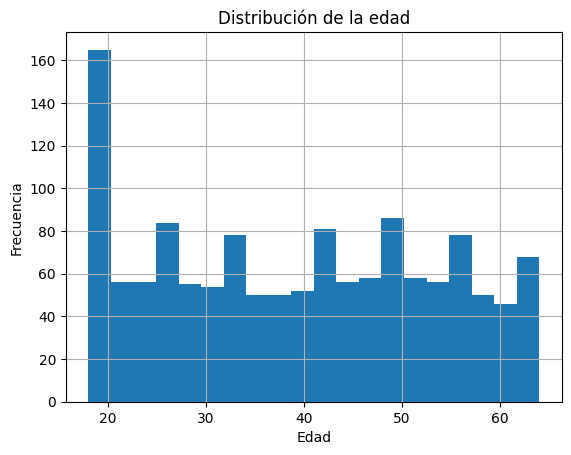

In [7]:
data["age"].hist(bins=20)
plt.title("Distribución de la edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

#### Con este boxplot podemos ver que tenemos outliers; es decir, personas con un imb demasiado alto. 

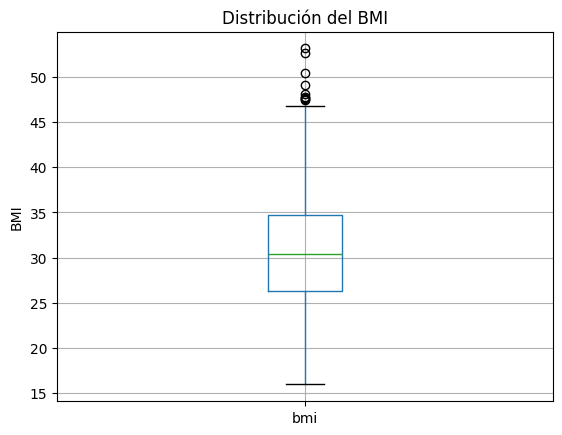

In [8]:

data.boxplot(column='bmi')
plt.title('Distribución del BMI')
plt.ylabel('BMI')
plt.show()

#### Al echar un vistazo en el BMI por región, vemos que el sur es donde tenemos mas personas con ibm muy altos

<Figure size 1000x600 with 0 Axes>

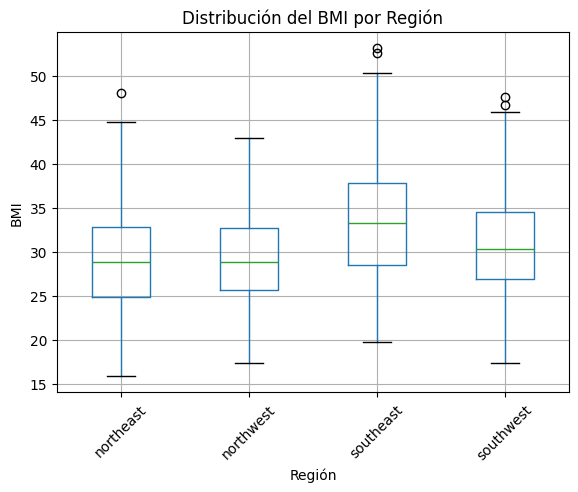

In [9]:
plt.figure(figsize=(10, 6))
data.boxplot(column='bmi', by='region')
plt.title('Distribución del BMI por Región')
plt.xlabel('Región')
plt.ylabel('BMI')
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mejor visualización
plt.suptitle('')  # Suprime el título automático para 'by='
plt.show()

### Ahora analicemos algunas de las variables categóricas

#### En la siguiente gráfica veremos la distribución de sexo en nuestra población y tambíen la de los fumadores

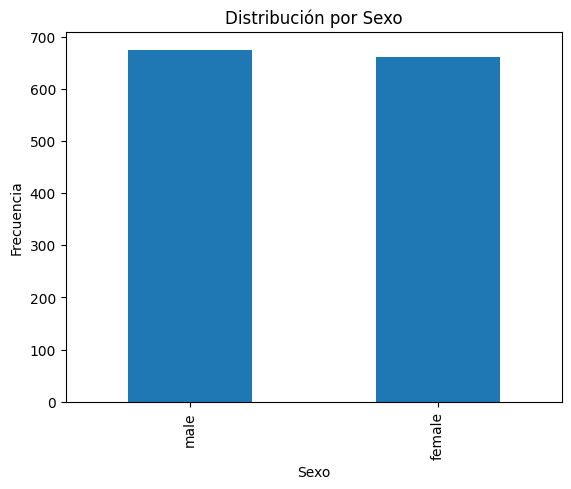

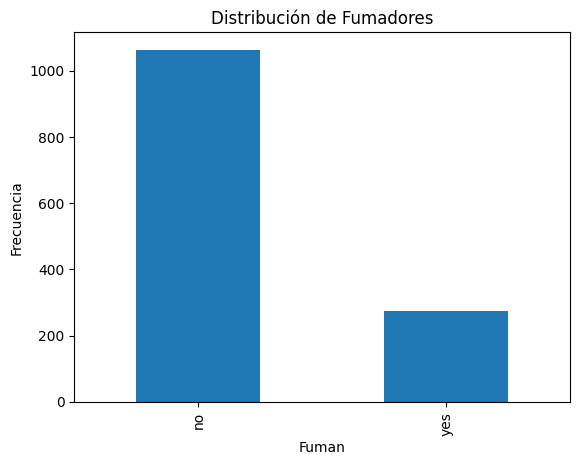

In [10]:
data['sex'].value_counts().plot(kind='bar')
plt.title('Distribución por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.show()

data['smoker'].value_counts().plot(kind='bar')
plt.title('Distribución de Fumadores')
plt.xlabel('Fuman')
plt.ylabel('Frecuencia')
plt.show()

#### Relaciones entre algunas variables

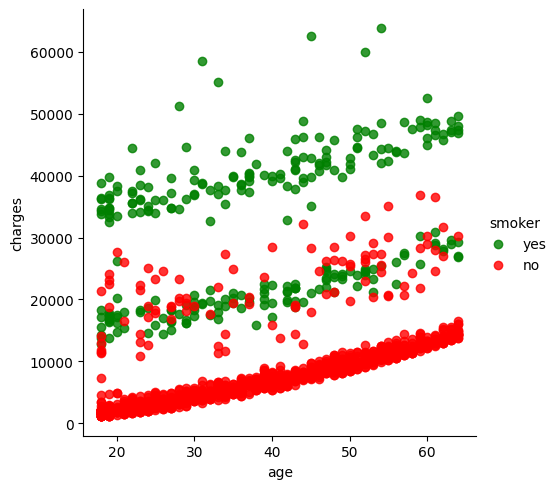

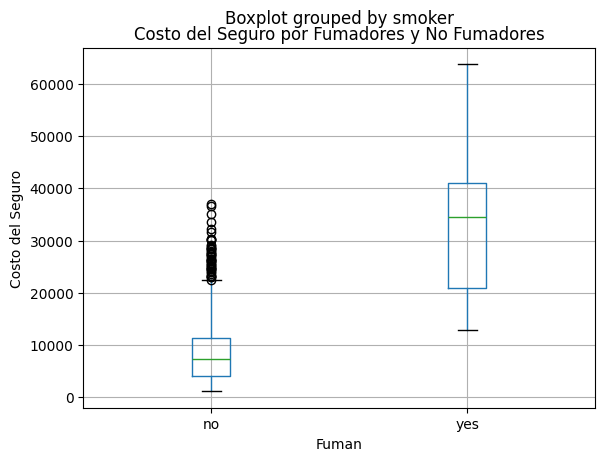

In [35]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = ['green', 'red'], fit_reg=False)

data.boxplot(column='charges', by='smoker')
plt.title('Costo del Seguro por Fumadores y No Fumadores')
plt.xlabel('Fuman')
plt.ylabel('Costo del Seguro')
plt.show()


In [12]:
corr_matrix = data[["age", 'bmi', 'children','charges']].corr()
print(corr_matrix)


               age       bmi  children   charges
age       1.000000  0.109344  0.041536  0.298308
bmi       0.109344  1.000000  0.012755  0.198401
children  0.041536  0.012755  1.000000  0.067389
charges   0.298308  0.198401  0.067389  1.000000


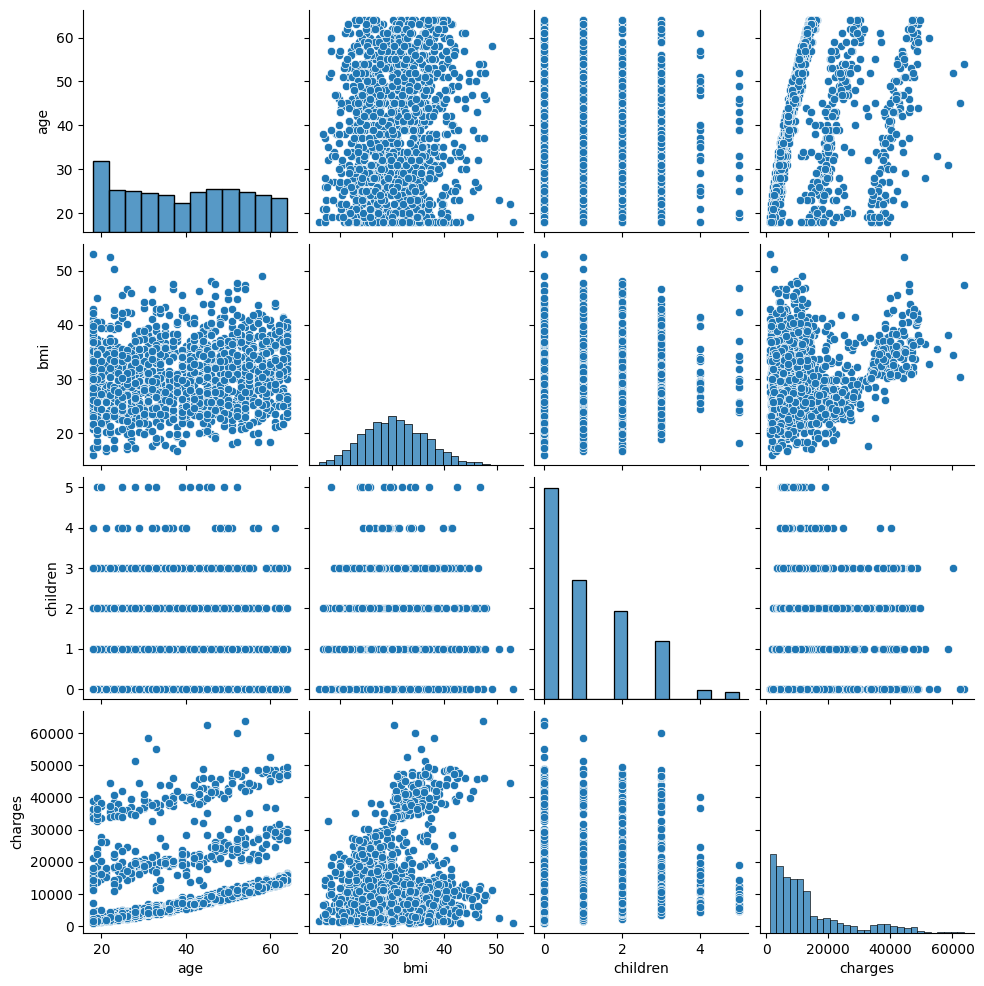

In [13]:
sns.pairplot(data)
plt.show()

# Creación de un módelo de regresión. 


In [31]:
df = data 
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


<Axes: >

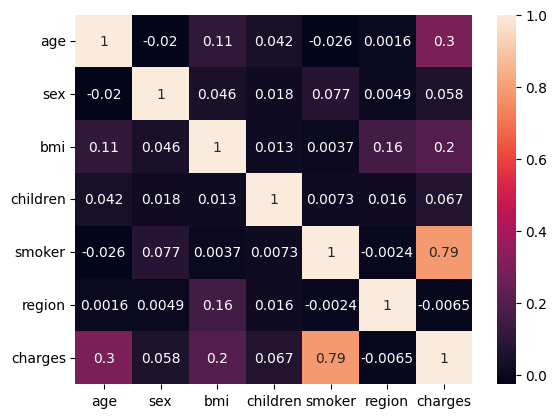

In [26]:
sns.heatmap(df.corr(), annot=True)

In [20]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

df['sex']= label_encoder.fit_transform(df['sex']) 
df['smoker']= label_encoder.fit_transform(df['smoker'])
df['region']= label_encoder.fit_transform(df['region']) 

In [22]:
from sklearn.model_selection import train_test_split
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split



In [24]:
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.8068466322629111


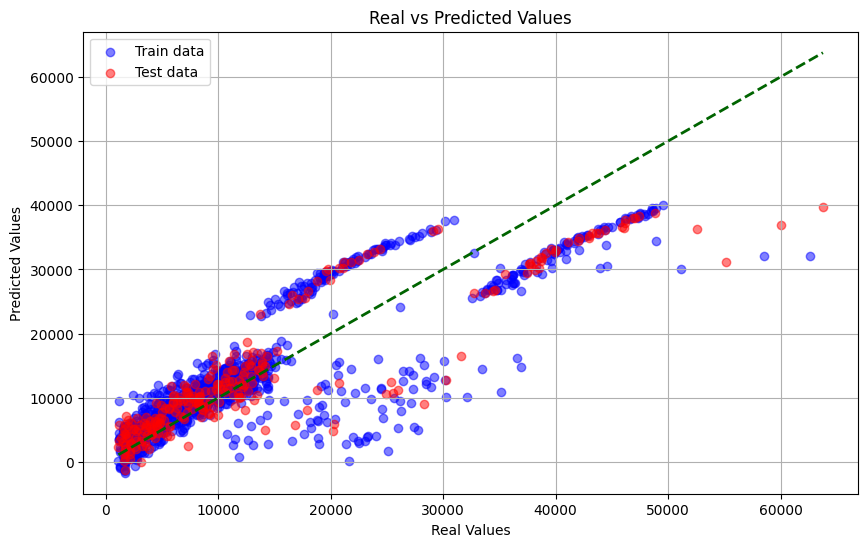

In [25]:
plt.figure(figsize=(10, 6))

# Ploteando datos de entrenamiento
plt.scatter(y_train, y_train_pred, color='blue', label='Train data', alpha=0.5)

# Ploteando datos de prueba
plt.scatter(y_test, y_test_pred, color='red', label='Test data', alpha=0.5)

# Línea ideal
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], 
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], 
         color='darkgreen', linestyle='--', linewidth=2)

plt.title('Real vs Predicted Values')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()